# 2017 Kaggle Machine Learning & Data Science Survey
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('dataset/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# 16,716명의 응답자
mcq = pd.read_csv('dataset/multipleChoiceResponses.csv',
                 encoding='ISO-8859-1', low_memory=False)
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcq.tail(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16706,Male,Australia,NaN,Employed full-time,NaN,NaN,Yes,NaN,Other,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16707,Female,Indonesia,30.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16708,Male,Indonesia,21.0,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,Male,People 's Republic of China,34.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16710,Male,People 's Republic of China,23.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


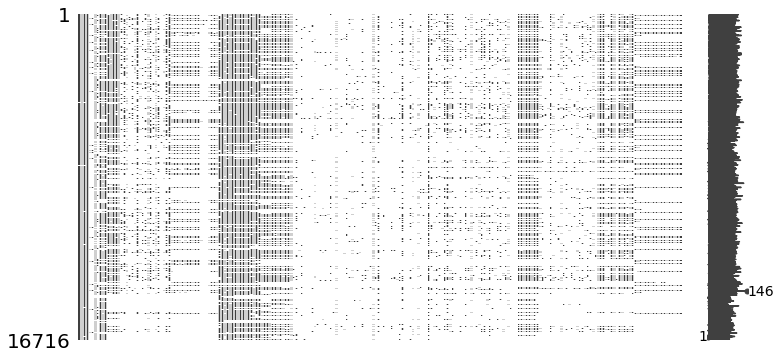

In [7]:
# NaN 데이터 시각화
import missingno as msno
msno.matrix(mcq, figsize=(12, 6))

 - 총 290개의 질문(객관식 228개, 주관식 62개)에 대해 응답하지 않은 질문 다수
***

## 설문통계
 - 성별

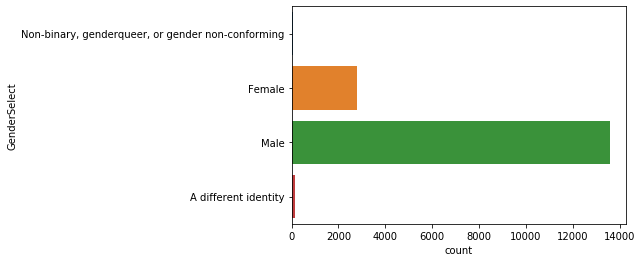

In [8]:
sns.countplot(y='GenderSelect', data=mcq)

 - 국가별 응답 수

In [9]:
country_df = pd.DataFrame(mcq['Country'].value_counts())
country_df['국가'] = country_df.index
country_df.columns = ['응답 수', '국가']

# reset_index : 기존의 행 인덱스 제거
country_df = country_df.reset_index().drop('index', axis=1)
country_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


 - 연령

In [10]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

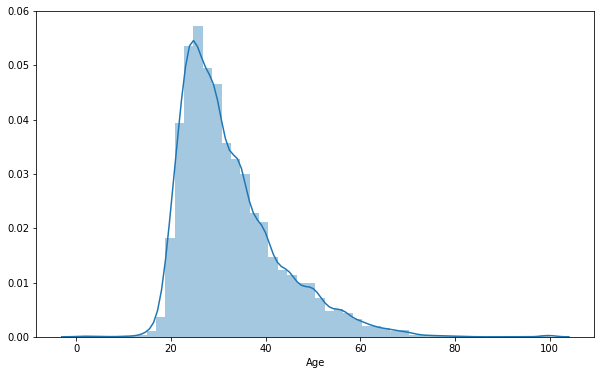

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(mcq[mcq['Age']>0]['Age'])

***
## 학력

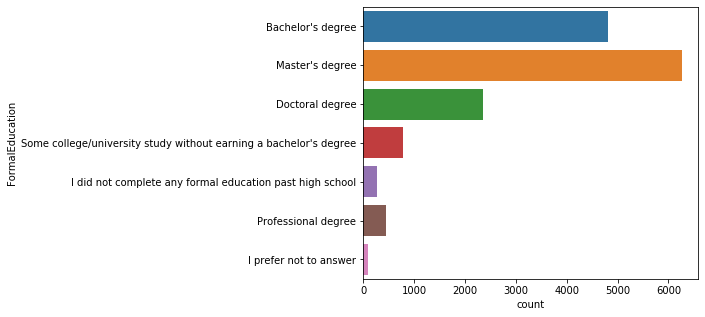

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(y='FormalEducation', data=mcq)

 - 박사 학위 < 학사 학위 < 석사 학위

***
## 전공

In [13]:
# value_count에서 normalize=True 사용 시 해당 데이터의 비율 알 수 있음
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))*100

mcq_major_df = mcq_major_count.merge(mcq_major_percent,
                                    left_index=True, right_index=True)
mcq_major_df.columns = ['응답 수', '비율(%)']
mcq_major_df

,응답 수,비율(%)
Computer Science,4397,33.107447
Mathematics or statistics,2220,16.715609
Engineering (non-computer focused),1339,10.082072
Electrical Engineering,1303,9.811008
Other,848,6.385061
Physics,830,6.249529
"Information technology, networking, or system administration",693,5.217981
A social science,531,3.998193
Biology,274,2.063098
Management information systems,237,1.784504


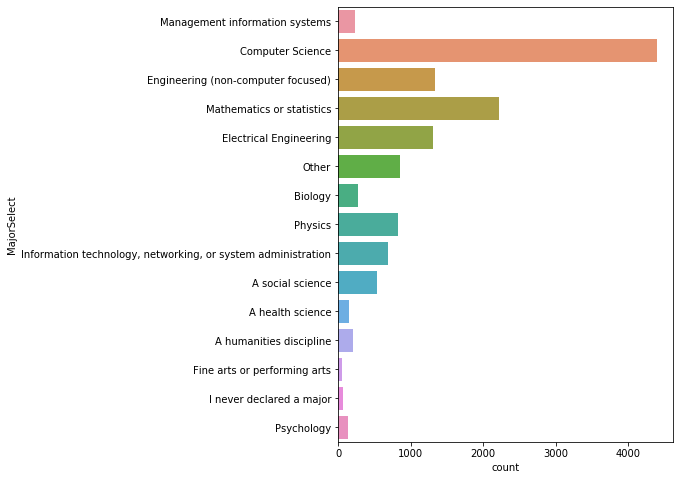

In [14]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

***
## 취업 여부

In [15]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))*100
mcq_es_df = mcq_es_count.merge(mcq_es_percent,
                              left_index=True, right_index=True)

mcq_es_df.columns = ['응답 수', '비율(%)']
mcq_es_df

,응답 수,비율(%)
Employed full-time,10897,65.189040
"Not employed, but looking for work",2110,12.622637
"Independent contractor, freelancer, or self-employed",1330,7.956449
"Not employed, and not looking for work",924,5.527638
Employed part-time,917,5.485762
I prefer not to say,420,2.512563
Retired,118,0.705911


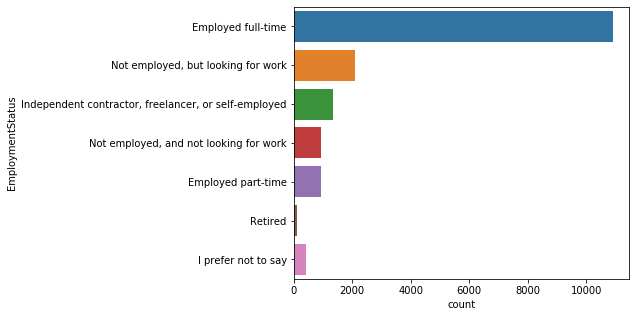

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(y='EmploymentStatus', data=mcq)

 - 응답자의 대부분(65%)이 풀타임으로 근무
***
## 프로그래밍 경험

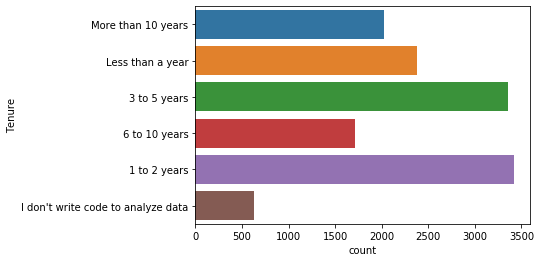

In [17]:
sns.countplot(y='Tenure', data=mcq)

 - 우리나라 기준

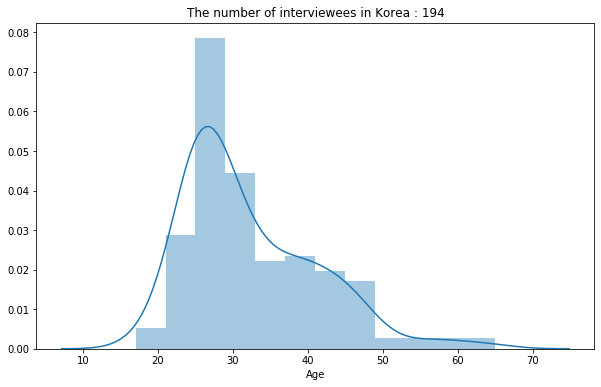

In [18]:
korea = mcq[mcq['Country'] == 'South Korea']
title = 'The number of interviewees in Korea : ' + str(korea.shape[0])

plt.figure(figsize=(10, 6))
sns.distplot(korea['Age'].dropna())
plt.title(title)
plt.show()

In [19]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


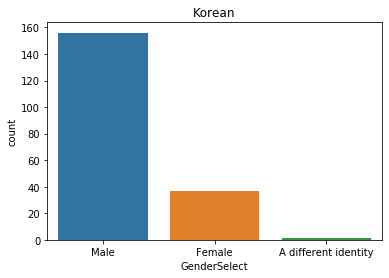

In [20]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')
plt.show()

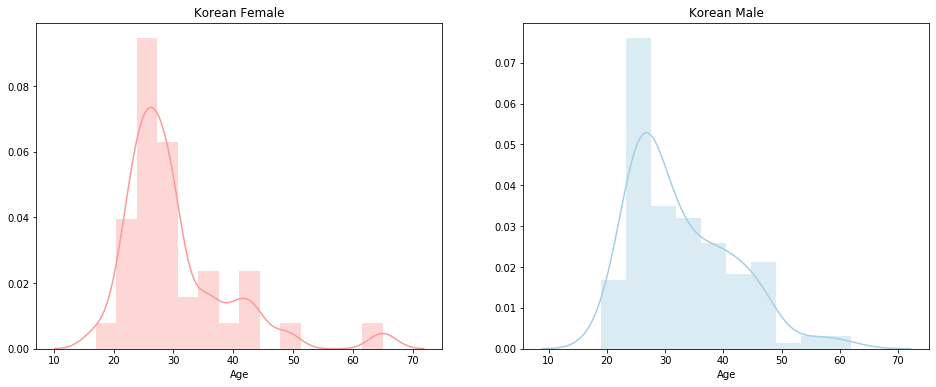

In [21]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(16, 6)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
ax1.title.set_text('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
ax2.title.set_text('Korean Male')

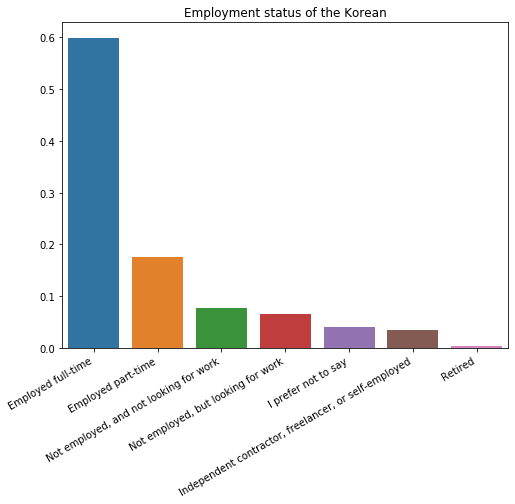

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

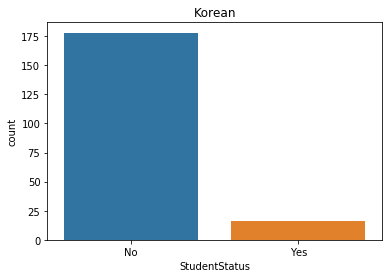

In [23]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Korean')
plt.show()